In [1]:
# Importing modules used for file management
import os 
import sys

# Importing modules used for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# the next line is necessary to display plots in Jupyter
%matplotlib inline

# Create file path for battery md module
# Battery md from Eugene Ragasa and Vincent La
battery_md_path = "/Users/kims3/Documents/projects/2CEE_Project/repo/battery_md-main/src/"
sys.path.append(battery_md_path)

# Importing premade classes and methods to analyze NVT data
# Modules made by Eugene Ragasa and Vincent La
import MDAnalysis as mda
from MDAnalysis.analysis import rms, msd
from sklearn.linear_model import LinearRegression
from battery_md.jobs import Nvt
from battery_md.mixtures import ElectrolyteMixture
# from battery_md.io.lammps.diffusion import calculate_diffusion_coefficient

In [2]:
def check_if_project_path_exists(project_path):
    project_path_exists = os.path.isdir(project_path)
    print(f"project_path:{project_path}")
    print(f"project_path_exists:{project_path_exists}")
    return os.path.isdir(project_path_exists)

def get_mixture_name(mixture, timesteps):
    mixture_ratios = [v for v in mixture['solvent_composition_by_volume'].values()]
    str_mixture_ratios = ":".join([str(k) for k in mixture_ratios])
    mixture_name = "_".join([timesteps, str_mixture_ratios])
    return mixture_name

def get_sim_name(mixture, T, timesteps):
    mixture_ratios = [v for v in mixture['solvent_composition_by_volume'].values()]
    str_mixture_ratios = "_".join([str(k) for k in mixture_ratios])
    molec_names = [k for k in mixture['solvent_composition_by_volume'].keys()]
    str_molec_names = "_".join([str(k) for k in molec_names])
    temp = str(T) + "K"
    fileName = "_".join([timesteps, mixture.get('solute_symbol'), str_mixture_ratios, str_molec_names, "nvt", temp])
    return fileName
    

In [25]:
# Function to create line-graph of columns of the data
def line_plots(mixtures, fig_num, x, y, title, xlabel='', ylabel=''):
    
    
    fig_name = "Fig" + str(fig_num)
    figure = plt.figure(fig_name)
    
    for mixture in mixtures:
        df = data[data['mixture_name'] == mixture]
        plt.plot(df[x], df[y], label = mixture)
        
    # Customize/format plots
    plt.title(title)
    plt.xlim(df[x].min(), df[x].max())
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(loc="upper left")
    plt.show
    
    plt.savefig(".".join([plot_path, title, "png"]))

In [4]:
project_path = "000allMixtures"
project_path_exists = os.path.isdir(project_path)
print(f"project_path={project_path}")
print(f"project_path_exists={project_path_exists}")
results_path = '{}_{}.csv'.format('LiPF6', 'CEE_MPN')

# list of temps I held the simulation at
temperatures = [230, 240, 250, 260, 270, 280, 290, 300]

# temperature mixture
electrolyte_mixtures = [
    {'solute_n_moles': 1.0, 'solute_symbol': 'LiPF6', 'solvent_composition_by_volume': {'CEE': 100, 'MPN': 0}},
    {'solute_n_moles': 1.0, 'solute_symbol': 'LiPF6', 'solvent_composition_by_volume': {'CEE': 66, 'MPN': 33}},
    {'solute_n_moles': 1.0, 'solute_symbol': 'LiPF6', 'solvent_composition_by_volume': {'CEE': 66, 'MPN': 33}},
    {'solute_n_moles': 1.0, 'solute_symbol': 'LiPF6', 'solvent_composition_by_volume': {'CEE': 0, 'MPN': 100}}
]

atom_symbols = ["Li", "P"]
solvent_symbols = ['2CEE', '3MPN']


project_path=000allMixtures
project_path_exists=True


In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# Since above code takes too long
# Read generated csv 
data = pd.read_csv (os.path.join(project_path, results_path))

# Organize dataframe to remove o_rmsd and index
data_org = data.drop(columns = ["o_rmsd", "Unnamed: 0"])
data_org

,mixture_name,temperature,Li.D,Li.kappa,P.D,P.kappa
0,100K_100:0,230,1.711657e-08,0.083325,4.156705e-09,0.020235
1,100K_100:0,240,1.318724e-08,0.061522,6.614542e-09,0.030859
2,100K_100:0,250,1.315744e-08,0.058928,6.561208e-09,0.029385
3,100K_100:0,260,1.702067e-08,0.073298,2.957023e-09,0.012734
4,100K_100:0,270,7.288148e-09,0.030223,6.591142e-09,0.027333
5,100K_100:0,280,1.230735e-08,0.049215,4.241345e-09,0.016960
6,100K_100:0,290,1.726413e-08,0.066655,2.391535e-08,0.092335
7,100K_100:0,300,1.369436e-08,0.051110,1.046642e-08,0.039063
8,100K_66:33,230,1.694222e-08,0.082477,1.966479e-08,0.095730
9,100K_66:33,240,1.353097e-08,0.063126,2.643908e-08,0.123346


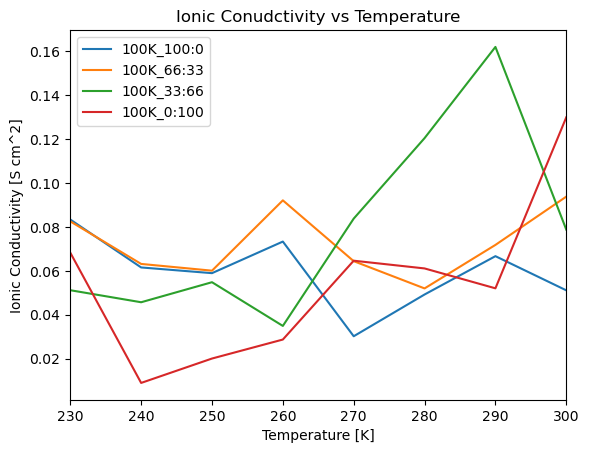

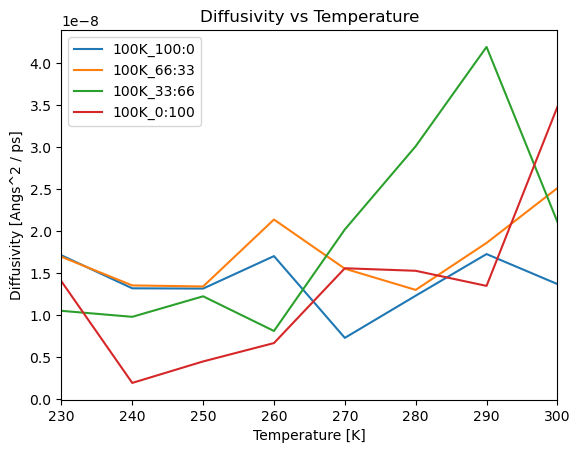

In [26]:
#plotting
from matplotlib import style
style.use('default')

plot_path = os.path.join(project_path, 'plots')
mixtures = data.mixture_name.unique() 


line_plots(mixtures, 1, 'temperature', 'Li.kappa', title = 'Ionic Conudctivity vs Temperature', 
           xlabel='Temperature [K]', ylabel='Ionic Conductivity [S cm^2]')

line_plots(mixtures, 2, 'temperature', 'Li.D', title = 'Diffusivity vs Temperature', 
           xlabel='Temperature [K]', ylabel='Diffusivity [Angs^2 / ps]')


